### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# prompt: Con DataFrame tienda: suggest a plot

import altair as alt

# Crea un gráfico de dispersión que muestre la relación entre el precio y el costo de envío, coloreado por categoría de producto.
alt.Chart(tienda).mark_point().encode(
    x='Precio',
    y='Costo de envío',
    color='Categoría del Producto',
    tooltip=['Producto', 'Precio', 'Costo de envío', 'Categoría del Producto']
).interactive()


alt.Chart(...)

#1. Análisis de facturación



In [ ]:
import pandas as pd

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Lee archivos csv y los convierte en DataFrame
tienda1 = pd.read_csv(url_tienda1)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

tienda.head()
print(tienda.head)


#Función para calcular la facturación por tienda
def calcular_facturacion(tienda_df, nombre_tienda):
    facturacion = tienda_df['Precio'].sum()
    print(f"La facturación de la tienda {nombre_tienda} es: {facturacion:,.2f}")
    return facturacion

# Calcular e imprimir resultados de facturación por tienda
facturacion_tiendas = [calcular_facturacion(tienda, f"Tienda {i+1}") for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4])]

# Calcular la facturación total
facturacion_total = sum(facturacion_tiendas)
print(f"La facturación total de todas las tiendas es: {facturacion_total:,.2f}")



<bound method NDFrame.head of                Producto Categoría del Producto     Precio  Costo de envío  \
0     Asistente virtual           Electrónicos   164300.0          6900.0   
1       Mesa de comedor                Muebles   192300.0          8400.0   
2         Juego de mesa               Juguetes   209600.0         15900.0   
3            Microondas      Electrodomésticos   757500.0         41000.0   
4      Silla de oficina                Muebles   335200.0         20200.0   
...                 ...                    ...        ...             ...   
2354          Iphone 15           Electrónicos  1284400.0         66600.0   
2355          Impresora           Electrónicos   282800.0         15300.0   
2356      Juego de mesa               Juguetes   122900.0          7200.0   
2357           Cama box                Muebles   691300.0         35000.0   
2358         Smartwatch           Electrónicos   195000.0          8600.0   

     Fecha de Compra         Vendedor Lugar d

# 2. Ventas por categoría

In [ ]:

# Función para calcular las ventas por categoría de una tienda
def calcular_ventas_por_categoria(tienda_df, nombre_tienda):

    ventas_por_categoria = tienda_df.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nVentas por categoría en {nombre_tienda}:")
    print(ventas_por_categoria.to_string())  # Imprime la serie formateada
    return ventas_por_categoria

# Calcular las ventas por categoría para cada tienda
ventas_categoria_tienda1 = calcular_ventas_por_categoria(tienda1, "Tienda 1")
ventas_categoria_tienda2 = calcular_ventas_por_categoria(tienda2, "Tienda 2")
ventas_categoria_tienda3 = calcular_ventas_por_categoria(tienda3, "Tienda 3")
ventas_categoria_tienda4 = calcular_ventas_por_categoria(tienda4, "Tienda 4")


Ventas por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0

Ventas por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguete

# 3. Calificación promedio de la tienda


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

# Función para calcular el promedio de calificación de una tienda
def calcular_promedio_calificacion(tienda_df, nombre_tienda):
    promedio_calificacion = tienda_df['Calificación'].mean()
    print(f"El promedio de calificación de la tienda {nombre_tienda} es: {promedio_calificacion:.2f}")
    return promedio_calificacion

# Calcular el promedio de calificación para cada tienda
promedio_tienda1 = calcular_promedio_calificacion(tienda, "Tienda 1")
promedio_tienda2 = calcular_promedio_calificacion(tienda2, "Tienda 2")
promedio_tienda3 = calcular_promedio_calificacion(tienda3, "Tienda 3")
promedio_tienda4 = calcular_promedio_calificacion(tienda4, "Tienda 4")




El promedio de calificación de la tienda Tienda 1 es: 3.98
El promedio de calificación de la tienda Tienda 2 es: 4.04
El promedio de calificación de la tienda Tienda 3 es: 4.05
El promedio de calificación de la tienda Tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [19]:
import pandas as pd

# Cargar los datos de las tiendas desde las URLs
url_tienda = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url_tienda)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

def calcular_productos_mas_menos_vendidos(tienda_df, nombre_tienda):

    # Agrupa por producto y cuenta las apariciones para inferir la cantidad vendida
    ventas_por_producto = tienda_df['Producto'].value_counts()

    # Encuentra el producto más vendido
    producto_mas_vendido = ventas_por_producto.idxmax()
    cantidad_mas_vendido = ventas_por_producto.max()

    # Encuentra el producto menos vendido
    producto_menos_vendido = ventas_por_producto.idxmin()
    cantidad_menos_vendido = ventas_por_producto.min()

    print(f"\nEn la tienda {nombre_tienda}:")
    print(f"Producto más vendido: {producto_mas_vendido} (Cantidad: {cantidad_mas_vendido})")
    print(f"Producto menos vendido: {producto_menos_vendido} (Cantidad: {cantidad_menos_vendido})")

    return (producto_mas_vendido, producto_menos_vendido)


# Calcular los productos más y menos vendidos para cada tienda
calcular_productos_mas_menos_vendidos(tienda, "Tienda 1")
calcular_productos_mas_menos_vendidos(tienda2, "Tienda 2")
calcular_productos_mas_menos_vendidos(tienda3, "Tienda 3")
calcular_productos_mas_menos_vendidos(tienda4, "Tienda 4")



En la tienda Tienda 1:
Producto más vendido: Microondas (Cantidad: 60)
Producto menos vendido: Auriculares con micrófono (Cantidad: 33)

En la tienda Tienda 2:
Producto más vendido: Iniciando en programación (Cantidad: 65)
Producto menos vendido: Juego de mesa (Cantidad: 32)

En la tienda Tienda 3:
Producto más vendido: Kit de bancas (Cantidad: 57)
Producto menos vendido: Bloques de construcción (Cantidad: 35)

En la tienda Tienda 4:
Producto más vendido: Cama box (Cantidad: 62)
Producto menos vendido: Guitarra eléctrica (Cantidad: 33)


('Cama box', 'Guitarra eléctrica')


En la tienda Tienda 1:
Producto más vendido: Microondas (Cantidad: 60)
Producto menos vendido: Auriculares con micrófono (Cantidad: 33)

En la tienda Tienda 2:
Producto más vendido: Iniciando en programación (Cantidad: 65)
Producto menos vendido: Juego de mesa (Cantidad: 32)

En la tienda Tienda 3:
Producto más vendido: Kit de bancas (Cantidad: 57)
Producto menos vendido: Bloques de construcción (Cantidad: 35)

En la tienda Tienda 4:
Producto más vendido: Cama box (Cantidad: 62)
Producto menos vendido: Guitarra eléctrica (Cantidad: 33)


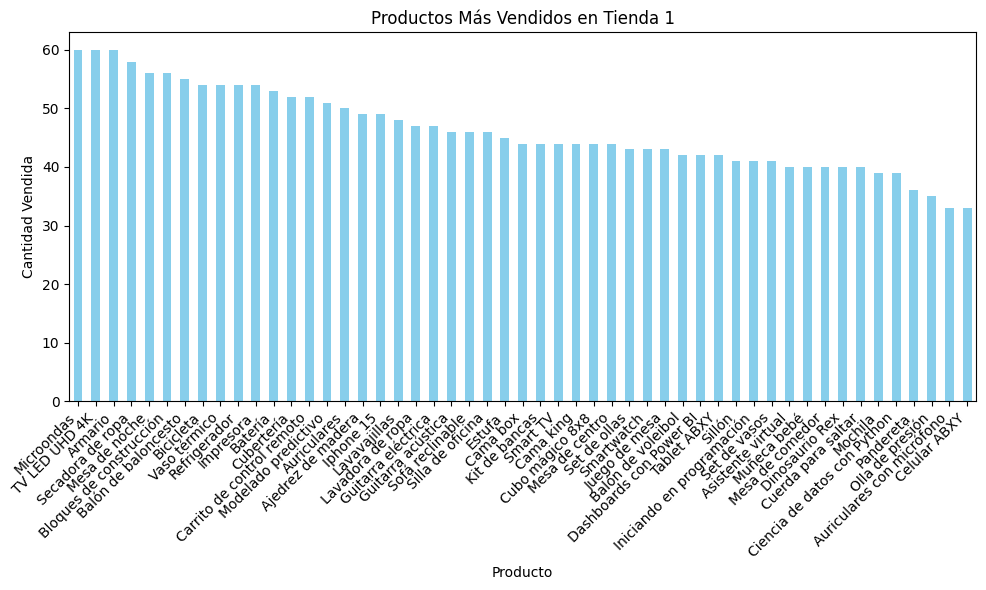

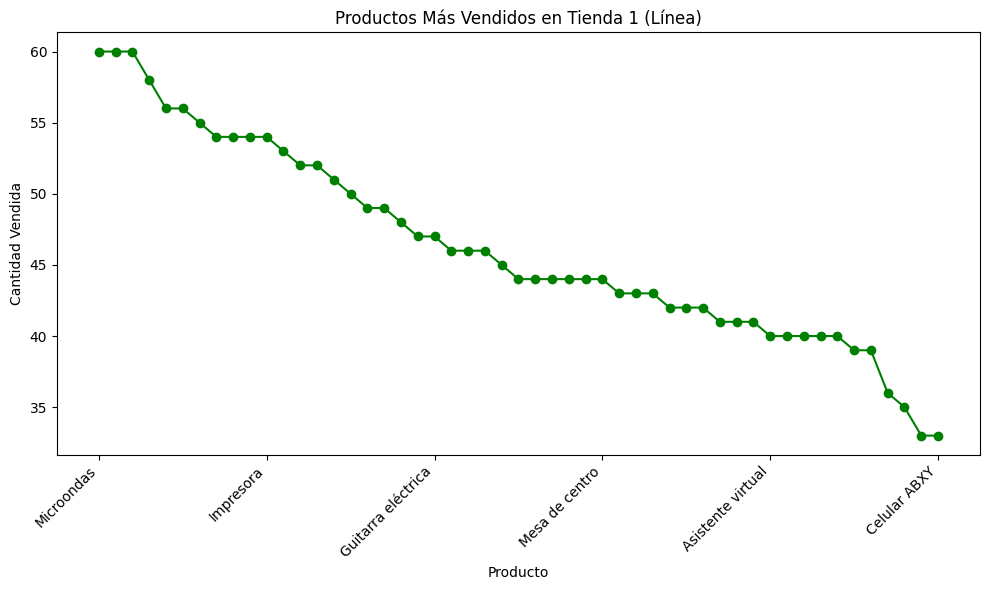

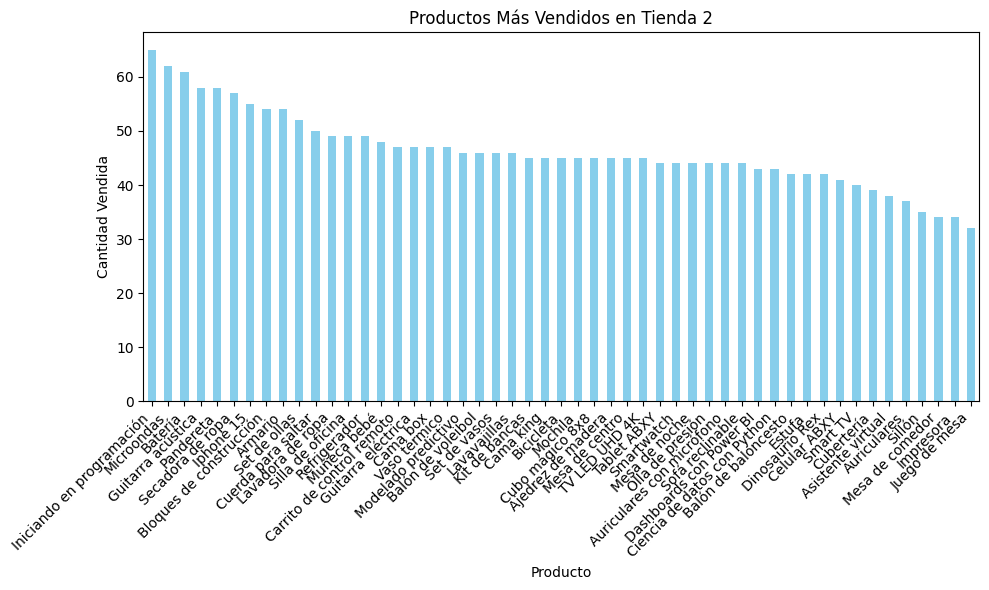

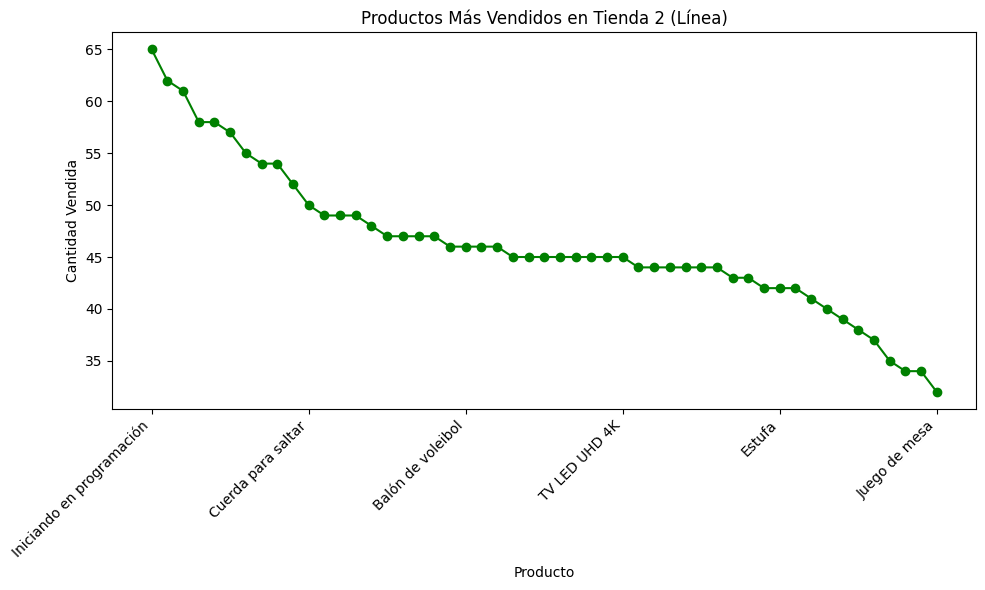

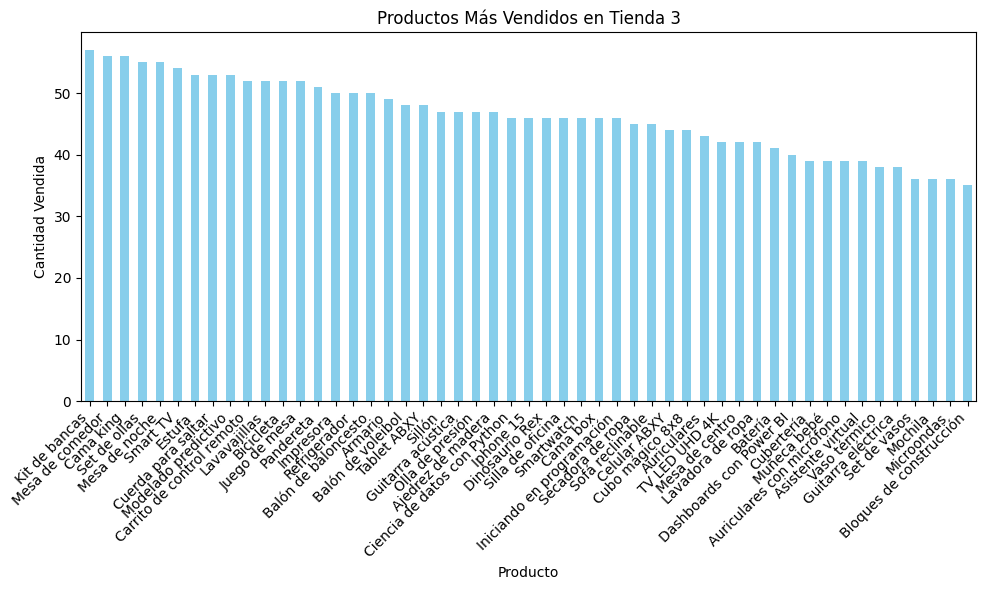

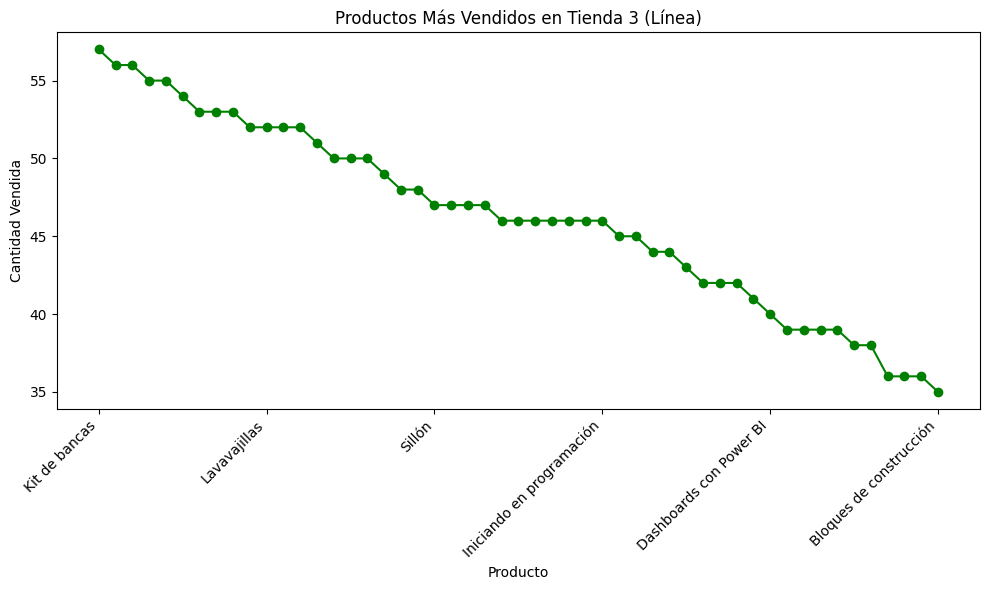

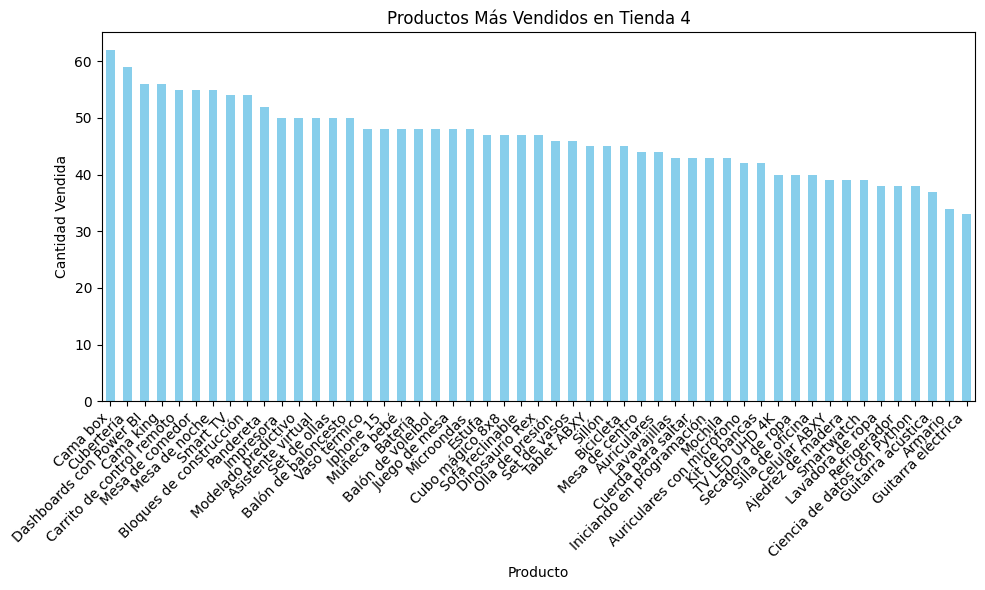

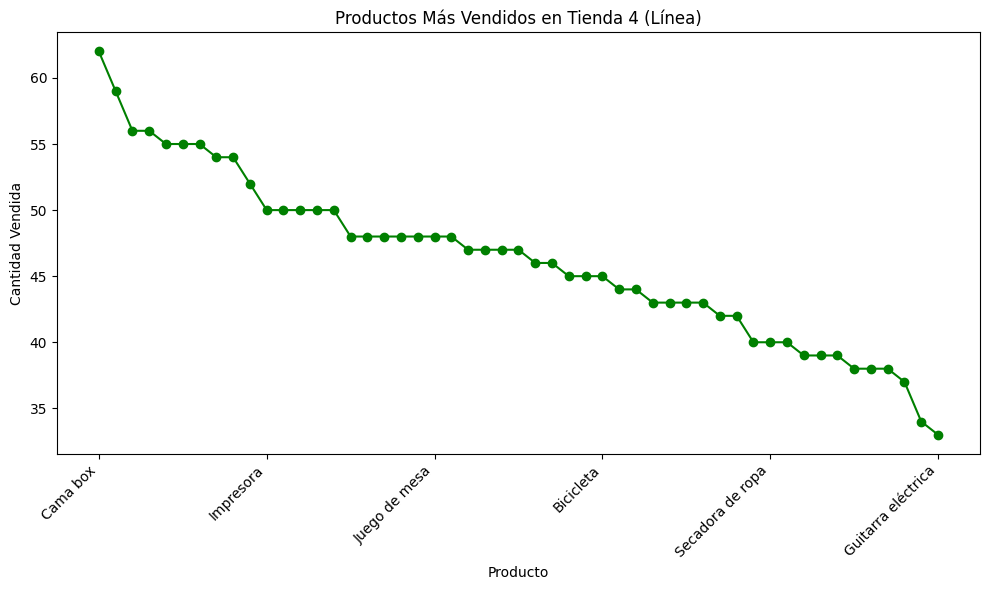

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url_tienda1)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

def calcular_productos_mas_menos_vendidos(tienda_df, nombre_tienda):
    """
    Calcula los productos más y menos vendidos de una tienda y devuelve las series
    con el número de ventas por producto.

    Args:
        tienda_df (pd.DataFrame): DataFrame de la tienda.
        nombre_tienda (str): Nombre de la tienda.

    Returns:
        tuple: Dos series de Pandas, la primera con las ventas por producto de
               forma descendente y la segunda de forma ascendente.
    """
    # Agrupa por producto y cuenta las apariciones para inferir la cantidad vendida
    ventas_por_producto = tienda_df['Producto'].value_counts()

    # Encuentra el producto más vendido
    producto_mas_vendido = ventas_por_producto.idxmax()
    cantidad_mas_vendido = ventas_por_producto.max()

    # Encuentra el producto menos vendido
    producto_menos_vendido = ventas_por_producto.idxmin()
    cantidad_menos_vendido = ventas_por_producto.min()

    print(f"\nEn la tienda {nombre_tienda}:")
    print(f"Producto más vendido: {producto_mas_vendido} (Cantidad: {cantidad_mas_vendido})")
    print(f"Producto menos vendido: {producto_menos_vendido} (Cantidad: {cantidad_menos_vendido})")

    return ventas_por_producto.sort_values(ascending=False), ventas_por_producto.sort_values(ascending=True)


# Calcular los productos más y menos vendidos para cada tienda
ventas_tienda1_desc, ventas_tienda1_asc = calcular_productos_mas_menos_vendidos(tienda1, "Tienda 1")
ventas_tienda2_desc, ventas_tienda2_asc = calcular_productos_mas_menos_vendidos(tienda2, "Tienda 2")
ventas_tienda3_desc, ventas_tienda3_asc = calcular_productos_mas_menos_vendidos(tienda3, "Tienda 3")
ventas_tienda4_desc, ventas_tienda4_asc = calcular_productos_mas_menos_vendidos(tienda4, "Tienda 4")

# Crear gráficos de barras y líneas para cada tienda
tiendas = [
    ("Tienda 1", ventas_tienda1_desc),
    ("Tienda 2", ventas_tienda2_desc),
    ("Tienda 3", ventas_tienda3_desc),
    ("Tienda 4", ventas_tienda4_desc),
]

for nombre_tienda, ventas_producto in tiendas:
    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    ventas_producto.plot(kind='bar', color='skyblue')
    plt.title(f'Productos Más Vendidos en {nombre_tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Gráfico de líneas
    plt.figure(figsize=(10, 6))
    ventas_producto.plot(kind='line', marker='o', color='green')
    plt.title(f'Productos Más Vendidos en {nombre_tienda} (Línea)')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda


El valor de envío promedio en la tienda Tienda 1 es: 26018.61

El valor de envío promedio en la tienda Tienda 2 es: 25216.24

El valor de envío promedio en la tienda Tienda 3 es: 24805.68

El valor de envío promedio en la tienda Tienda 4 es: 23459.46


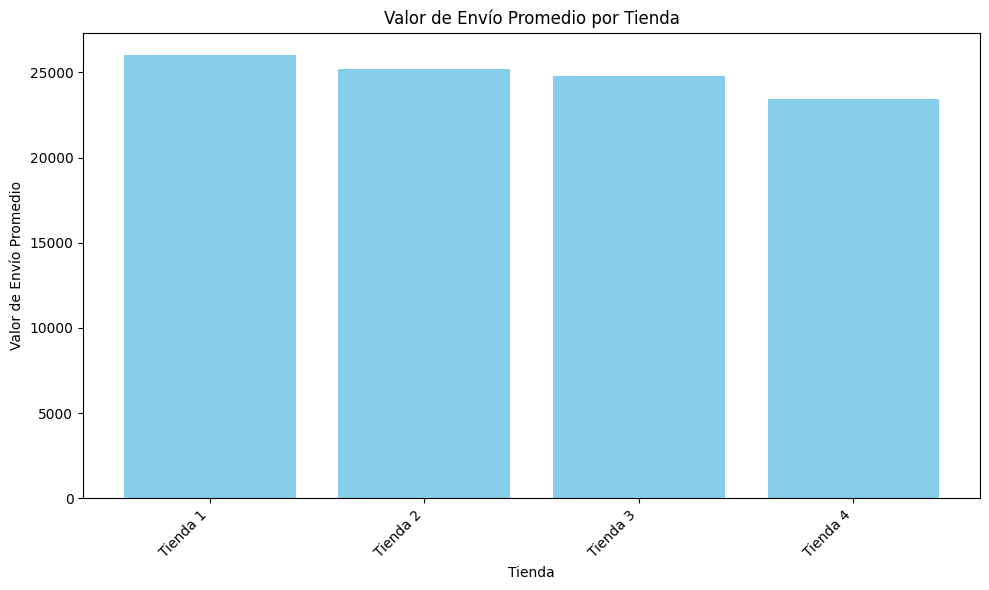

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url_tienda1)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

# Calcular el valor de envío promedio por tienda
def calcular_envio_promedio(tienda_df, nombre_tienda):
    """
    Calcula el valor de envío promedio de una tienda.

    Args:
        tienda_df (pd.DataFrame): DataFrame de la tienda.
        nombre_tienda (str): Nombre de la tienda.

    Returns:
        float: Valor de envío promedio de la tienda.
    """
    if 'Costo de envío' not in tienda_df.columns:
        print(f"Error: La columna 'Costo de envío' no existe en el DataFrame de la tienda {nombre_tienda}.")
        return 0  # Retorna 0 si la columna no existe para evitar errores

    valor_envio_promedio = tienda_df['Costo de envío'].mean()
    print(f"\nEl valor de envío promedio en la tienda {nombre_tienda} es: {valor_envio_promedio:.2f}")
    return valor_envio_promedio

# Calcular el valor de envío promedio para cada tienda
envio_promedio_tienda1 = calcular_envio_promedio(tienda1, "Tienda 1")
envio_promedio_tienda2 = calcular_envio_promedio(tienda2, "Tienda 2")
envio_promedio_tienda3 = calcular_envio_promedio(tienda3, "Tienda 3")
envio_promedio_tienda4 = calcular_envio_promedio(tienda4, "Tienda 4")

# Crear un gráfico de barras sencillo
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
valores_envio_promedio = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura para mejor visualización
plt.bar(tiendas, valores_envio_promedio, color='skyblue')
plt.title('Valor de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Valor de Envío Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajusta los parámetros del subplot para que el gráfico se ajuste
plt.show()

# 6.- Ranking de vendedores

In [12]:
import pandas as pd
import plotly.figure_factory as ff

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url_tienda1)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

# Función para calcular el total vendido por vendedor y agregar el nombre de la tienda
def calcular_ventas_por_vendedor(tienda_df, nombre_tienda):
    """
    Calcula el total vendido por cada vendedor en una tienda, agrega el nombre de la tienda
    y lo formatea para que sea compatible con la concatenación.

    Args:
        tienda_df (pd.DataFrame): DataFrame de la tienda.
        nombre_tienda (str): Nombre de la tienda.

    Returns:
        pd.DataFrame: DataFrame con el total vendido por vendedor y el nombre de la tienda,
                      o None si la columna 'Precio' no existe.
    """
    if 'Precio' not in tienda_df.columns or 'Vendedor' not in tienda_df.columns:
        print(f"Error: No se pueden calcular las ventas por vendedor en {nombre_tienda} porque faltan las columnas 'Precio' o 'Vendedor'.")
        return None

    ventas_por_vendedor = tienda_df.groupby('Vendedor')['Precio'].sum().reset_index()
    ventas_por_vendedor['Tienda'] = nombre_tienda  # Añade el nombre de la tienda
    return ventas_por_vendedor

# Calcular las ventas por vendedor para cada tienda
ventas_tienda1 = calcular_ventas_por_vendedor(tienda1, "Tienda 1")
ventas_tienda2 = calcular_ventas_por_vendedor(tienda2, "Tienda 2")
ventas_tienda3 = calcular_ventas_por_vendedor(tienda3, "Tienda 3")
ventas_tienda4 = calcular_ventas_por_vendedor(tienda4, "Tienda 4")

# Concatenar los DataFrames de ventas de todas las tiendas
ventas_todas_tiendas = pd.concat([df for df in [ventas_tienda1, ventas_tienda2, ventas_tienda3, ventas_tienda4] if df is not None], ignore_index=True)

# Verificar si hay datos para procesar
if ventas_todas_tiendas is None or ventas_todas_tiendas.empty:
    print("No hay datos de ventas para procesar.")
    exit()

# Calcular el ranking global de vendedores
ranking_global = ventas_todas_tiendas.sort_values(by='Precio', ascending=False).reset_index(drop=True)
ranking_global['Puesto'] = ranking_global.index + 1

# Crear la tabla de resumen de vendedores
tabla_resumen = ranking_global[['Vendedor', 'Precio', 'Puesto', 'Tienda']]
tabla_resumen.columns = ['Nombre', 'Total ventas', 'Puesto en el ranking', 'Tienda a la que pertenece'] #Renombrar las columnas
print("\nTabla de resumen de vendedores:")
print(tabla_resumen.to_markdown(index=False, numalign="left", stralign="left"))

# Crear la campana de Gauss
import plotly.figure_factory as ff
import numpy as np

# Preparar los datos para el gráfico
data = []
for tienda in tabla_resumen['Tienda a la que pertenece'].unique():
    data.append(tabla_resumen[tabla_resumen['Tienda a la que pertenece'] == tienda]['Total ventas'].values)

# Crear la figura
fig = ff.create_distplot(data, group_labels=tabla_resumen['Tienda a la que pertenece'].unique(),
                         show_hist=False, bin_size=5000)  # Ajusta bin_size según la escala de tus datos

# Personalizar el diseño
fig.update_layout(
    title='Distribución de Ventas por Tienda (Campana de Gauss)',
    xaxis_title='Total de Ventas',
    yaxis_title='Densidad',
    legend_title='Tienda',
    template='plotly_dark'  # Puedes cambiar el tema a 'plotly', 'seaborn', etc.
)

# Mostrar el gráfico
fig.show()


Tabla de resumen de vendedores:
| Nombre          | Total ventas   | Puesto en el ranking   | Tienda a la que pertenece   |
|:----------------|:---------------|:-----------------------|:----------------------------|
| Maria Alfonso   | 1.01529e+08    | 1                      | Tienda 1                    |
| Maria Alfonso   | 9.63285e+07    | 2                      | Tienda 3                    |
| Rafael Acosta   | 9.62713e+07    | 3                      | Tienda 1                    |
| Felipe Santos   | 9.5432e+07     | 4                      | Tienda 4                    |
| Izabela de León | 9.37765e+07    | 5                      | Tienda 1                    |
| Izabela de León | 9.18122e+07    | 6                      | Tienda 2                    |
| Felipe Santos   | 9.02069e+07    | 7                      | Tienda 1                    |
| Pedro Gomez     | 9.01404e+07    | 8                      | Tienda 2                    |
| Felipe Santos   | 8.78618e+07    | 9         

# 7.- Tienda mas antigua

In [6]:
import pandas as pd

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV usando pandas
tienda_1 = pd.read_csv(url_tienda1)
tienda_2 = pd.read_csv(url_tienda2)
tienda_3 = pd.read_csv(url_tienda3)
tienda_4 = pd.read_csv(url_tienda4)

# Convertir la columna 'Fecha de Compra' a tipo datetime para cada DataFrame
tienda_1['Fecha de Compra'] = pd.to_datetime(tienda_1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda_2['Fecha de Compra'] = pd.to_datetime(tienda_2['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda_3['Fecha de Compra'] = pd.to_datetime(tienda_3['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda_4['Fecha de Compra'] = pd.to_datetime(tienda_4['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')

# Función para encontrar la tienda más antigua
def encontrar_tienda_mas_antigua(tiendas):
    """
    Encuentra la tienda con la venta más antigua.

    Args:
        tiendas (list): Una lista de DataFrames de tiendas.

    Returns:
        tuple: El nombre de la tienda más antigua y la fecha de su venta más antigua.
               Retorna (None, None) si no hay tiendas o si hay un error.
    """
    tienda_mas_antigua = None
    fecha_mas_antigua = None
    fechas_de_inicio = [] # Inicializa una lista para guardar las fechas de inicio de cada tienda

    for nombre_tienda, tienda_df in tiendas:
        # Verifica si el DataFrame está vacío o si la columna 'Fecha de Compra' no existe
        if tienda_df.empty or 'Fecha de Compra' not in tienda_df.columns:
            print(f"Advertencia: La tienda {nombre_tienda} no tiene datos de ventas o la columna 'Fecha de Compra' no existe.")
            fechas_de_inicio.append((nombre_tienda, None))  # Agrega la tienda con fecha de inicio None
            continue  # Pasa a la siguiente tienda

        # Elimina las filas donde 'Fecha de Compra' es nulo
        tienda_df = tienda_df.dropna(subset=['Fecha de Compra'])

        # Verifica nuevamente si el DataFrame está vacío después de eliminar nulos
        if tienda_df.empty:
            print(f"Advertencia: La tienda {nombre_tienda} no tiene datos de ventas válidos después de eliminar fechas nulas.")
            fechas_de_inicio.append((nombre_tienda, None))  # Agrega la tienda con fecha de inicio None
            continue  # Pasa a la siguiente tienda

        fecha_de_venta_mas_antigua_de_la_tienda = tienda_df['Fecha de Compra'].min()
        fechas_de_inicio.append((nombre_tienda, fecha_de_venta_mas_antigua_de_la_tienda)) # Agrega la tienda y su fecha de inicio a la lista
        if fecha_mas_antigua is None or fecha_de_venta_mas_antigua_de_la_tienda < fecha_mas_antigua:
            fecha_mas_antigua = fecha_de_venta_mas_antigua_de_la_tienda
            tienda_mas_antigua = nombre_tienda

    return tienda_mas_antigua, fecha_mas_antigua, fechas_de_inicio # Retorna las fechas de inicio de las tiendas



# Iterar sobre cada tienda y encontrar las fechas de venta
tiendas = [
    ("Tienda 1", tienda_1),
    ("Tienda 2", tienda_2),
    ("Tienda 3", tienda_3),
    ("Tienda 4", tienda_4),
]

tienda_mas_antigua, fecha_mas_antigua, fechas_de_inicio = encontrar_tienda_mas_antigua(tiendas) #Guarda todos los retornos de la función

if tienda_mas_antigua:
    print(f"La tienda más antigua es: {tienda_mas_antigua}")
    print(f"Fecha de la venta más antigua: {fecha_mas_antigua}")
else:
    print("No se pudo determinar la tienda más antigua.")

# Imprimir la lista de tiendas ordenadas por antigüedad
print("\nTiendas ordenadas por antigüedad:")
for nombre_tienda, fecha_inicio in sorted(fechas_de_inicio, key=lambda x: x[1] if x[1] else pd.Timestamp.max): #Ordena las tiendas por fecha de inicio
    if fecha_inicio:
        print(f"{nombre_tienda}: {fecha_inicio}")
    else:
        print(f"{nombre_tienda}: Sin datos de ventas")

La tienda más antigua es: Tienda 1
Fecha de la venta más antigua: 2020-01-01 00:00:00

Tiendas ordenadas por antigüedad:
Tienda 1: 2020-01-01 00:00:00
Tienda 2: 2020-01-01 00:00:00
Tienda 3: 2020-01-01 00:00:00
Tienda 4: 2020-01-01 00:00:00


# 8.- Diponible

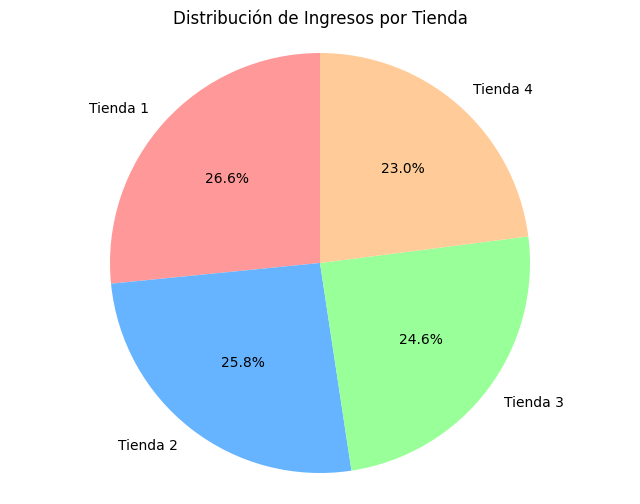

| Producto         | Ingresos Tienda 1   | Cantidad Tienda 1   | Ingresos Tienda 2   | Cantidad Tienda 2   | Ingresos Tienda 3   | Cantidad Tienda 3   | Ingresos Tienda 4   | Cantidad Tienda 4   |
|:-----------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|
| TV LED UHD 4K    | 142,150,200.00      | 60                  | 103,375,000.00      | 45                  | 96,669,100.00       | 42                  | 90,295,300.00       | 40                  |
| Iphone 15        | 97,902,200.00       | 49                  | 113,225,800.00      | 55                  | 93,225,700.00       | 46                  | 96,697,500.00       | 48                  |
| Refrigerador     | 112,143,300.00      | 54                  | 97,632,500.00       | 49                  | 99,889,700.00       | 50                  | 75,271,900.00       | 38                  |
| Smart TV     

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url_tienda1)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

def calcular_ingresos_por_producto(tienda_df):

    ingresos_por_producto = tienda_df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    return ingresos_por_producto

# Calcular ingresos por producto para cada tienda
ingresos_tienda1 = calcular_ingresos_por_producto(tienda1)
ingresos_tienda2 = calcular_ingresos_por_producto(tienda2)
ingresos_tienda3 = calcular_ingresos_por_producto(tienda3)
ingresos_tienda4 = calcular_ingresos_por_producto(tienda4)

# Concatenar los ingresos de todas las tiendas
ingresos_todas_tiendas = pd.concat([ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4], axis=1, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Calcular la cantidad vendida de cada producto en cada tienda
cantidad_tienda1 = tienda1['Producto'].value_counts()
cantidad_tienda2 = tienda2['Producto'].value_counts()
cantidad_tienda3 = tienda3['Producto'].value_counts()
cantidad_tienda4 = tienda4['Producto'].value_counts()

# Crear un DataFrame con las cantidades vendidas
cantidad_por_tienda = pd.DataFrame({
    'Tienda 1': cantidad_tienda1,
    'Tienda 2': cantidad_tienda2,
    'Tienda 3': cantidad_tienda3,
    'Tienda 4': cantidad_tienda4
}).fillna(0).astype(int)  # Fill NaN with 0 and convert to integer

# Encontrar los 10 productos con mayores ingresos
top_10_productos = ingresos_todas_tiendas.sum(axis=1).nlargest(10).index

# Crear la tabla final
tabla_top_10 = pd.DataFrame({
    'Producto': top_10_productos,
    'Ingresos Tienda 1': ingresos_todas_tiendas.loc[top_10_productos, 'Tienda 1'],
    'Cantidad Tienda 1': cantidad_por_tienda.loc[top_10_productos, 'Tienda 1'],
    'Ingresos Tienda 2': ingresos_todas_tiendas.loc[top_10_productos, 'Tienda 2'],
    'Cantidad Tienda 2': cantidad_por_tienda.loc[top_10_productos, 'Tienda 2'],
    'Ingresos Tienda 3': ingresos_todas_tiendas.loc[top_10_productos, 'Tienda 3'],
    'Cantidad Tienda 3': cantidad_por_tienda.loc[top_10_productos, 'Tienda 3'],
    'Ingresos Tienda 4': ingresos_todas_tiendas.loc[top_10_productos, 'Tienda 4'],
    'Cantidad Tienda 4': cantidad_por_tienda.loc[top_10_productos, 'Tienda 4'],
})

# Agregar la fila de totales
totales = tabla_top_10[['Ingresos Tienda 1', 'Cantidad Tienda 1', 'Ingresos Tienda 2', 'Cantidad Tienda 2',
                       'Ingresos Tienda 3', 'Cantidad Tienda 3', 'Ingresos Tienda 4', 'Cantidad Tienda 4']].sum()
totales_df = pd.DataFrame(totales.values.reshape(1, -1), columns=['Ingresos Tienda 1', 'Cantidad Tienda 1', 'Ingresos Tienda 2', 'Cantidad Tienda 2',
                       'Ingresos Tienda 3', 'Cantidad Tienda 3', 'Ingresos Tienda 4', 'Cantidad Tienda 4'], index=['Total'])
tabla_top_10_con_totales = pd.concat([tabla_top_10, totales_df])

# Formatear los valores de ingresos y cantidad con separador de miles
format_dict = {
    'Ingresos Tienda 1': '{:,.2f}',
    'Cantidad Tienda 1': '{:,}',
    'Ingresos Tienda 2': '{:,.2f}',
    'Cantidad Tienda 2': '{:,}',
    'Ingresos Tienda 3': '{:,.2f}',
    'Cantidad Tienda 3': '{:,}',
    'Ingresos Tienda 4': '{:,.2f}',
    'Cantidad Tienda 4': '{:,}'
}

# Aplica el formato al DataFrame
tabla_top_10_formateado = tabla_top_10_con_totales.copy()
for col, formato in format_dict.items():
    if col in tabla_top_10_formateado.columns:
        tabla_top_10_formateado[col] = tabla_top_10_formateado[col].apply(formato.format)

# Calcular ingresos totales por tienda
ingresos_por_tienda = totales_df[['Ingresos Tienda 1', 'Ingresos Tienda 2', 'Ingresos Tienda 3', 'Ingresos Tienda 4']].values[0]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(ingresos_por_tienda, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribución de Ingresos por Tienda')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Mostrar el gráfico de torta
plt.show()

# Convertir la tabla a Markdown
print(tabla_top_10_formateado.to_markdown(index=False, numalign="left", stralign="left"))

